# Machine Learning - UFRJ 2022.2
## Regressão Linear

#### Feito por Rafael da Silva Fernandes, DRE: 117196229

# Exercício

## Datasets

In [1]:
import pandas as pd

### Exemplo

In [2]:
df_exemplo = pd.read_csv("exemplo1-regressaoLinear.csv")
df_exemplo.head()

,X,Y
0,95.724162,197.179636
1,35.757619,67.590670
2,28.816847,60.854133
3,99.958481,196.907397
4,66.809748,125.311129


### Iris

In [3]:
df_iris = pd.read_csv("iris.csv")
df_iris.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Faça um programa que gere o modelo de regressão linear para os dois datasets usados na aula. Os modelos devem ser gerados de duas formas:

In [4]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

### a) Usando as equações apresentadas

In [5]:
def var_barra(df):
    return df.mean()

In [6]:
def var_quadrado_barra(df, n):
    return sum(df.pow(2))/ n

In [7]:
def var1_var2_barra(df1, df2, n):
    return sum((df1 * df2)/ n)

In [8]:
def theta0(var1_barra, var1_quadrado_barra, var2_barra, var1_var2_barra):
    
    numerador = var2_barra * var1_quadrado_barra - var1_barra * var1_var2_barra
    denominador = var1_quadrado_barra - (var1_barra ** 2)

    return numerador/ denominador

In [9]:
def theta1(var1_barra, var1_quadrado_barra, var2_barra, var1_var2_barra):

    numerador = var1_var2_barra - var1_barra * var2_barra
    denominador = var1_quadrado_barra - (var1_barra ** 2)

    return numerador/ denominador

#### Dataset Exemplo

In [10]:
exemplo_n = df_exemplo.shape[0]

exemplo_x_barra = var_barra(df_exemplo["X"])
exemplo_x_quadrado_barra = var_quadrado_barra(df_exemplo["X"], exemplo_n)
print(f"X_barra = {exemplo_x_barra} | X_quadrado_barra = {exemplo_x_quadrado_barra}")

exemplo_y_barra = var_barra(df_exemplo["Y"])
exemplo_y_quadrado_barra = var_quadrado_barra(df_exemplo["Y"], exemplo_n)
print(f"Y_barra = {exemplo_y_barra} | Y_quadrado_barra = {exemplo_y_quadrado_barra}")

exemplo_x_y_barra = var1_var2_barra(df_exemplo["X"], df_exemplo["Y"], exemplo_n)
print(f"X_Y_barra = {exemplo_x_y_barra}")

exemplo_theta0 = theta0(
    exemplo_x_barra, 
    exemplo_x_quadrado_barra,
    exemplo_y_barra, 
    exemplo_x_y_barra
)
print(f"\nTheta 0 = {exemplo_theta0}")

exemplo_theta1 = theta1(
    exemplo_x_barra, 
    exemplo_x_quadrado_barra,
    exemplo_y_barra, 
    exemplo_x_y_barra
)
print(f"Theta 1 = {exemplo_theta1}\n")

%time

X_barra = 67.93012202823 | X_quadrado_barra = 5124.991702295573
Y_barra = 134.1000086212 | Y_quadrado_barra = 19994.153430738115
X_Y_barra = 10117.850602443814

Theta 0 = -0.08892359520679478
Theta 1 = 1.9753966018291795

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


Theta 0 diferencia do resultado do professor (-0.08892359520**725088**) a partir da 12° casa decimal, trecho que está em negrito.

Theta 1 diferencia do resultado do professor (1.9753966018291**83**) a partir da 14° casa decimal, trecho que está em negrito.

Demais resultados batem com os do professor.

> Referência: https://stackoverflow.com/questions/15125343/how-can-i-iterate-through-two-pandas-columns

In [11]:
for x_value, y_value in df_exemplo.itertuples(index = False):
    exemplo_y_predict = x_value * exemplo_theta1 + exemplo_theta0
    erro = y_value - exemplo_y_predict

    print(f"Y = {y_value} | Y-previsto = {exemplo_y_predict} | Erro = {erro}")

Y = 197.179636092 | Y-previsto = 189.00426153850088 | Erro = 8.175374553499125
Y = 67.5906695414 | Y-previsto = 70.5465553248647 | Erro = -2.9558857834646943
Y = 60.8541328206 | Y-previsto = 56.83577888119767 | Erro = 4.018353939402331
Y = 196.907396981 | Y-previsto = 197.36872070600472 | Erro = -0.46132372500471774
Y = 125.311128524 | Y-previsto = 131.8868261895783 | Erro = -6.5756976655783035
Y = 115.785784589 | Y-previsto = 114.9101578215492 | Erro = 0.8756267674507967
Y = 110.762772705 | Y-previsto = 106.22904770946974 | Erro = 4.533724995530264
Y = 157.98528569 | Y-previsto = 160.5030808662271 | Erro = -2.5177951762270823
Y = 159.61941373 | Y-previsto = 159.22423851808043 | Erro = 0.3951752119195646
Y = 149.003865539 | Y-previsto = 154.4914186565296 | Erro = -5.487553117529586


In [12]:
def plot_exemplo(x_axis, y_axis, color1, color2, theta_0, theta_1):
    x = np.linspace(0, 100, 200)

    plt.scatter(x_axis, y_axis, color = color1)
    plt.plot(x, x * theta_1 + theta_0, color = color2)

    plt.title("Exemplo")
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.show()

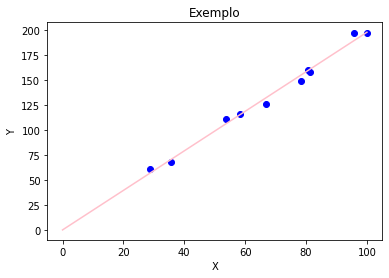

In [13]:
plot_exemplo(df_exemplo["X"], df_exemplo["Y"], "blue", "pink", exemplo_theta0, exemplo_theta1)

#### Dataset Iris

> Para não ficar maçante, pois o objetivo é comparar os resultados obtidos nessa célula com os do professor, optou-se por calcular - sem a ajuda de bibliotecas próprias para regressão linear - apenas 1 das 6 combinações possíveis entre as 4 colunas do dataset Iris. A combinação escolhida foi a primeira apresentada nos slides de aula: petalLengthInCM x petalWidthInCM.

In [14]:
iris_n = df_iris.shape[0]

iris_x_barra = var_barra(df_iris["petalLengthInCM"])
iris_x_quadrado_barra = var_quadrado_barra(df_iris["petalLengthInCM"], iris_n)

iris_y_barra = var_barra(df_iris["petalWidthInCM"])
iris_y_quadrado_barra = var_quadrado_barra(df_iris["petalWidthInCM"], iris_n)

iris_x_y_barra = var1_var2_barra(
    df_iris["petalLengthInCM"], 
    df_iris["petalWidthInCM"], 
    iris_n
)

iris_theta0 = theta0(
    iris_x_barra, 
    iris_x_quadrado_barra,
    iris_y_barra, 
    iris_x_y_barra
)
print(f"Theta 0 = {iris_theta0}")

iris_theta1 = theta1(
    iris_x_barra, 
    iris_x_quadrado_barra,
    iris_y_barra, 
    iris_x_y_barra
)
print(f"Theta 1 = {iris_theta1}\n")

%time

Theta 0 = -0.36651404521672454
Theta 1 = 0.41641913228540056

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


Theta 0 diferencia do resultado do professor (-0.3665140452167**3014**) no trecho em negrito.

O resultado de Theta 1 obtido pelo professor é uma aproximação do obtido acima, **0.41641913**228540056, sendo o trecho em negrito o apresentado pelo professor.

In [15]:
def plot_iris(x_axis, y_axis, theta_0, theta_1):

    x = np.linspace(0, 7, 3)

    sns.FacetGrid(
        df_iris, 
        hue = "class",
        height = 5
    ).map(
        plt.scatter,
        x_axis,
        y_axis
    ).add_legend()

    plt.plot(x, x * theta_1 + theta_0, color = "pink")

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)

    plt.show()

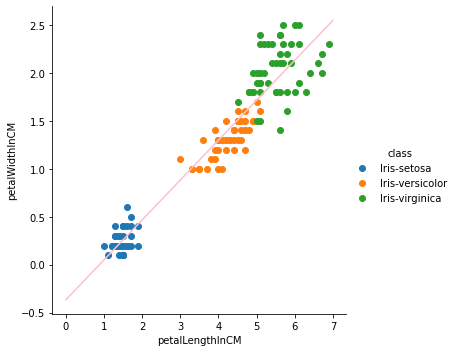

In [16]:
plot_iris("petalLengthInCM", "petalWidthInCM", iris_theta0, iris_theta1)

### b) Usando o modelo de regressão linear disponível no Scikit

> Referência: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Dataset Exemplo

In [18]:
exemplo_x_train, exemplo_x_test, exemplo_y_train, exemplo_y_test = train_test_split(
    df_exemplo["X"].values.reshape(-1, 1), 
    df_exemplo["Y"].values.reshape(-1, 1), 
    test_size = 0.2,
    random_state = 140922
)

exemplo_regressor = LinearRegression()
exemplo_regressor.fit(exemplo_x_train, exemplo_y_train)

exemplo_y_predict = exemplo_regressor.predict(exemplo_x_test)

print(f"Theta 0 = {exemplo_regressor.intercept_[0]} | Theta 1 = {exemplo_regressor.coef_[0][0]}\n")

%time

Theta 0 = -1.6829776621818553 | Theta 1 = 2.0004433418220233

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs


In [19]:
for x_value, y_value in df_exemplo.itertuples(index = False):
    exemplo_y_predict = x_value * exemplo_regressor.coef_[0][0] + exemplo_regressor.intercept_[0]
    erro = y_value - exemplo_y_predict

    print(f"Y = {y_value} | Y-previsto = {exemplo_y_predict} | Erro = {erro}")

Y = 197.179636092 | Y-previsto = 189.80778567839175 | Erro = 7.371850413608257
Y = 67.5906695414 | Y-previsto = 69.84811304194494 | Erro = -2.2574435005449374
Y = 60.8541328206 | Y-previsto = 55.96349289905998 | Erro = 4.890639921540021
Y = 196.907396981 | Y-previsto = 198.27830073044822 | Erro = -1.3709037494482175
Y = 125.311128524 | Y-previsto = 131.96613851756373 | Erro = -6.655009993563738
Y = 115.785784589 | Y-previsto = 114.7742170716641 | Erro = 1.011567517335905
Y = 110.762772705 | Y-previsto = 105.98303614766505 | Erro = 4.779736557334957
Y = 157.98528569 | Y-previsto = 160.94522863181092 | Erro = -2.9599429418109082
Y = 159.61941373 | Y-previsto = 159.6501713971163 | Erro = -0.030757667116319
Y = 149.003865539 | Y-previsto = 154.85734246781902 | Erro = -5.8534769288190205


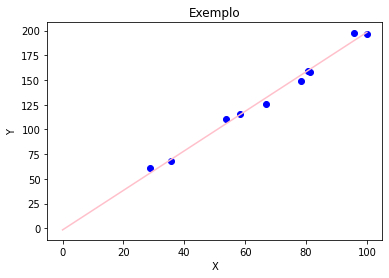

In [20]:
plot_exemplo(df_exemplo["X"], df_exemplo["Y"], "blue", "pink", exemplo_regressor.intercept_[0], exemplo_regressor.coef_[0][0])

#### Dataset Iris

> Para não ficar maçante, optou-se por calcular neste item apenas 1 das 6 combinações possíveis entre as 4 colunas do dataset Iris. A combinação escolhida foi a primeira apresentada nos slides de aula: petalLengthInCM x petalWidthInCM.

In [21]:
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(
    df_iris["petalLengthInCM"].values.reshape(-1, 1), 
    df_iris["petalWidthInCM"].values.reshape(-1, 1), 
    test_size = 0.2,
    random_state = 140922
)

iris_regressor = LinearRegression()
iris_regressor.fit(iris_x_train, iris_y_train)

print(f"Theta 0 = {iris_regressor.intercept_[0]} | Theta 1 = {iris_regressor.coef_[0][0]}")

%time

Theta 0 = -0.3394672029105077 | Theta 1 = 0.40724152155009047
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [22]:
# Calcular erro (y_previsto - y_real)

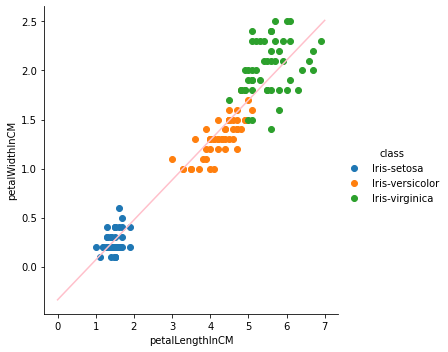

In [23]:
plot_iris("petalLengthInCM", "petalWidthInCM", iris_regressor.intercept_[0], iris_regressor.coef_[0][0])

## 2. No caso do dataset Iris, reproduza os modelos apresentados nos slides. Calcule as equações, os coeficientes de determinação e faça o F - test, considerando nível de confiança α = 0.5.

> Referência: https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python

In [24]:
from itertools import combinations
from sklearn.metrics import r2_score
from scipy.stats import f

In [25]:
column_combination = list(combinations(df_iris.columns[:-1], 2))
column_combination

[('sepalLengthInCM', 'sepalWidthInCM'),
 ('sepalLengthInCM', 'petalLengthInCM'),
 ('sepalLengthInCM', 'petalWidthInCM'),
 ('sepalWidthInCM', 'petalLengthInCM'),
 ('sepalWidthInCM', 'petalWidthInCM'),
 ('petalLengthInCM', 'petalWidthInCM')]



	Columns: sepalLengthInCM X sepalWidthInCM

Theta 0 = 3.3597253664484463 | Theta 1 = -0.05362889932021917
Coeficiente de determinação = 0.011210018862431559
F-test = 0.9927029222488484
Hipótese nula negada. Portanto, existe modelo.


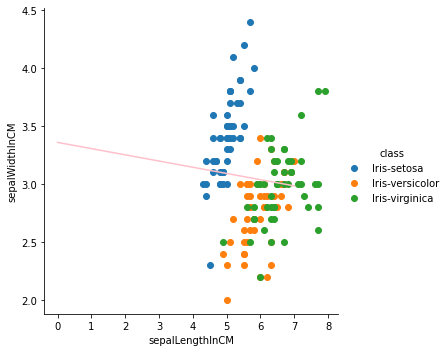



	Columns: sepalLengthInCM X petalLengthInCM

Theta 0 = -6.993867215096476 | Theta 1 = 1.8439172959480041
Coeficiente de determinação = 0.7774857320924922
F-test = 0.07320694153276644
Não foi possível negar a hipótese nula. Logo, não existe modelo.


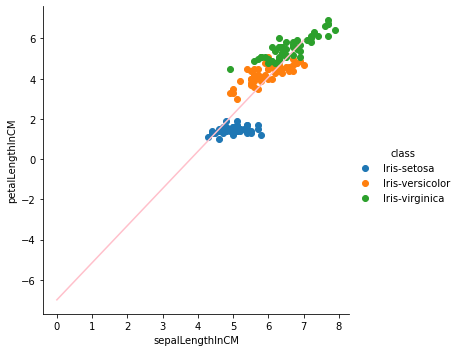



	Columns: sepalLengthInCM X petalWidthInCM

Theta 0 = -3.02266930415352 | Theta 1 = 0.722655698070553
Coeficiente de determinação = 0.7380290548960882
F-test = 0.6767430400613594
Hipótese nula negada. Portanto, existe modelo.


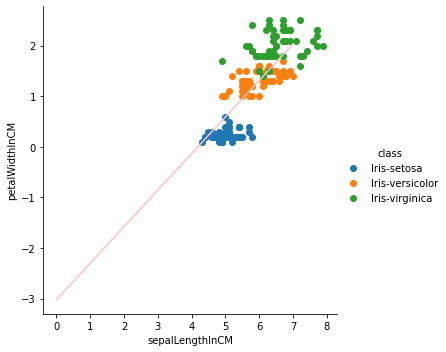



	Columns: sepalWidthInCM X petalLengthInCM

Theta 0 = 8.878868691700552 | Theta 1 = -1.6768715618273144
Coeficiente de determinação = 0.18300910013548477
F-test = 0.006809986356557174
Não foi possível negar a hipótese nula. Logo, não existe modelo.


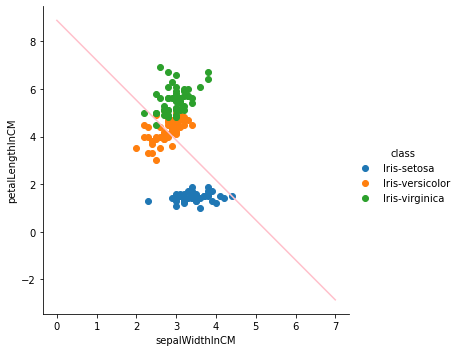



	Columns: sepalWidthInCM X petalWidthInCM

Theta 0 = 3.123227098780196 | Theta 1 = -0.6326237742166945
Coeficiente de determinação = 0.09436301572422212
F-test = 0.13765763292153715
Não foi possível negar a hipótese nula. Logo, não existe modelo.


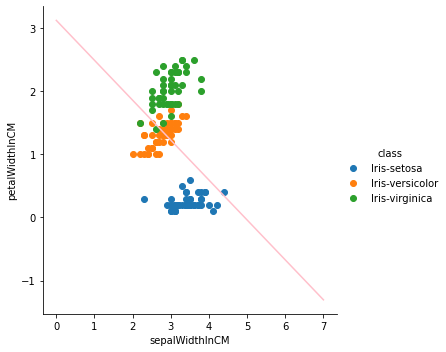



	Columns: petalLengthInCM X petalWidthInCM

Theta 0 = -0.3394672029105077 | Theta 1 = 0.40724152155009047
Coeficiente de determinação = 0.9410887763107872
F-test = 0.9995201998483684
Hipótese nula negada. Portanto, existe modelo.


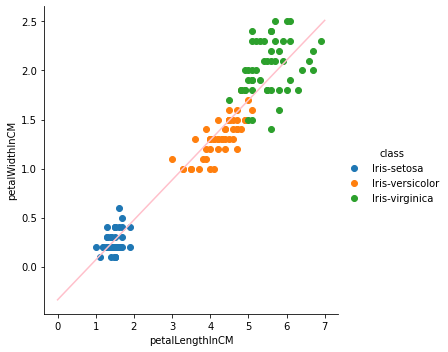

In [26]:
for columns in column_combination:

    iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(
        df_iris[columns[0]].values.reshape(-1, 1), 
        df_iris[columns[1]].values.reshape(-1, 1), 
        test_size = 0.2,
        random_state = 140922
    )

    iris_regressor = LinearRegression()
    iris_regressor.fit(iris_x_train, iris_y_train)

    print(f"\n\n\tColumns: {columns[0]} X {columns[1]}")
    print(f"\nTheta 0 = {iris_regressor.intercept_[0]} | Theta 1 = {iris_regressor.coef_[0][0]}")

    iris_y_predict = iris_regressor.predict(iris_x_test)
    r2 = r2_score(iris_y_test, iris_y_predict)
    print(f"Coeficiente de determinação = {r2}")

    dfn, dfd = 4, 146
    f_test = f.cdf(df_iris[columns[0]].var() / df_iris[columns[1]].var(), dfn, dfd)
    print(f"F-test = {f_test}")

    if(f_test > 0.5):
        print("Hipótese nula negada. Portanto, existe modelo.")
    else:
        print("Não foi possível negar a hipótese nula. Logo, não existe modelo.")

    plot_iris(columns[0], columns[1], iris_regressor.intercept_[0], iris_regressor.coef_[0][0])

Os valores do F-test divergem dos do professor.

## 3. Selecione aleatoriamente uma amostra contendo 10 exemplos do dataset. Faça um programa que gere um modelo de regressão Ridge a partir destes pontos, considerando o par de atributos sepalLengthInCM x petalLengthInCM. Seu programa deve gerar um gráfico com todos os pontos do dataset (com cores difirentes para as instâncias usadas na regressão Ridge e as demais), a reta obtida pela regressão linear e a reta obtida pela regressão Ridge. Use λ ∈ {1,5,10,50,100}.

> Referência: https://pythonguides.com/scikit-learn-ridge-regression/

In [27]:
from sklearn.linear_model import Ridge

In [28]:
sample = df_iris.sample(n = 10, random_state = 140922)
sample

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,class
61,5.9,3.0,4.2,1.5,Iris-versicolor
34,4.9,3.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
37,4.9,3.1,1.5,0.1,Iris-setosa
141,6.9,3.1,5.1,2.3,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
91,6.1,3.0,4.6,1.4,Iris-versicolor





Ridge score = 0.8853436264324607 para Alpha = 1
Theta 0 = -6.697634984381971 | Theta 1 = 1.800981704596162



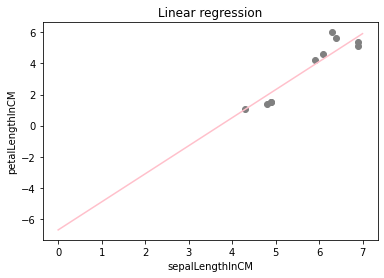

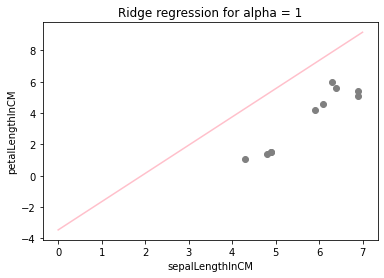




Ridge score = 0.7631446143819206 para Alpha = 5
Theta 0 = -3.507991360691145 | Theta 1 = 1.2452946621413143



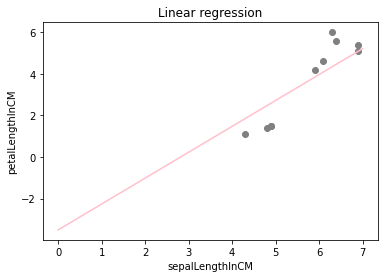

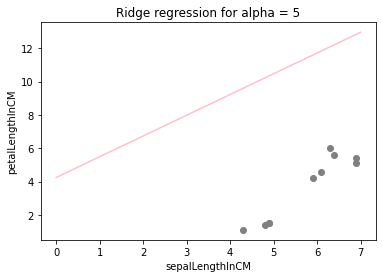




Ridge score = 0.6186927725381406 para Alpha = 10
Theta 0 = -1.5184591405032286 | Theta 1 = 0.8986862614117122



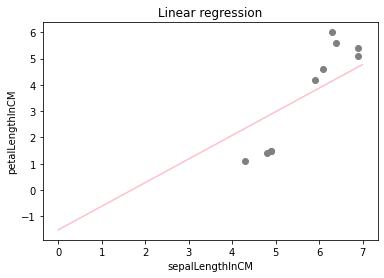

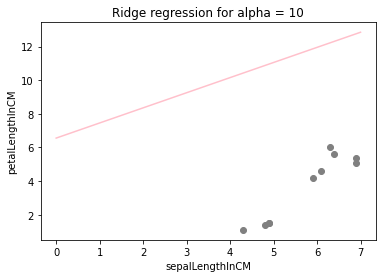




Ridge score = 0.2294267816595441 para Alpha = 50
Theta 0 = 2.041308398316196 | Theta 1 = 0.2785177006417776



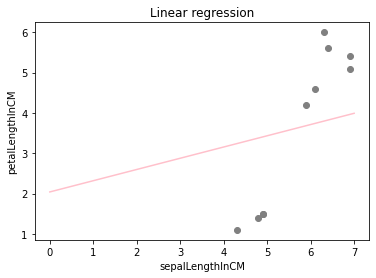

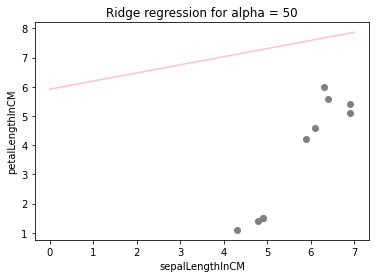




Ridge score = 0.1273831754942072 para Alpha = 100
Theta 0 = 2.781690193027305 | Theta 1 = 0.149531325256567



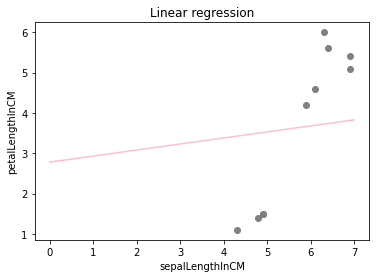

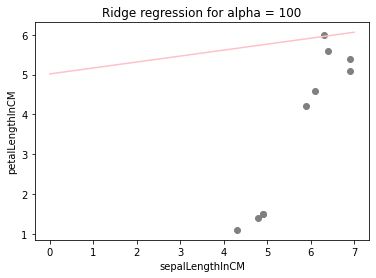

In [29]:
alphas = [1, 5, 10, 50, 100]

X = sample["sepalLengthInCM"].values.reshape(-1, 1)
y = sample["petalLengthInCM"].values.reshape(-1, 1)

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    print(f"\n\n\nRidge score = {ridge.score(X, y)} para Alpha = {alpha}")
    print(f"Theta 0 = {ridge.intercept_[0]} | Theta 1 = {ridge.coef_[0][0]}\n")
 
    x = np.linspace(0, 7, 3)

    # Linear regression plot
    plt.scatter(sample["sepalLengthInCM"], sample["petalLengthInCM"], color = "grey")
    plt.plot(x, x * ridge.coef_[0][0] + ridge.intercept_[0], color = "pink")

    plt.title(f"Linear regression")
    plt.xlabel("sepalLengthInCM")
    plt.ylabel("petalLengthInCM")

    plt.show()

    # Ridge regression plot
    plt.scatter(sample["sepalLengthInCM"], sample["petalLengthInCM"], color = "grey")
    plt.plot(x, x * ridge.coef_[0][0] + ridge.intercept_[0] + alpha * ridge.coef_[0][0] ** 2, color = "pink")

    plt.title(f"Ridge regression for alpha = {alpha}")
    plt.xlabel("sepalLengthInCM")
    plt.ylabel("petalLengthInCM")

    plt.show()

> Pelo que entendi da aula e do vídeo que nos foi passado, a ideia da regressão Ridge é pegar 2 pontos quaisquer da nossa amostra, e então fazer uma regressão linear acrescentando λ * (θ1)^2. Entretanto, o modelo do Scikit não permite que usemos apenas dois pontos, mas sim a distribuição inteira. Por essa razão não consegui selecionar e pintar dois pontos quaisquer.